#### 读取数据集

In [42]:
import numpy as np
import pandas as pd

In [43]:
train_df = pd.read_csv('data/回归类/train.csv') # 读取训练集数据
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
test_df = pd.read_csv('data/回归类/test.csv')  # 读取测试集数据
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [45]:
train_df = train_df.set_index(train_df.columns[0]) # 将ID设置为索引
test_df = test_df.set_index(test_df.columns[0]) # 将ID设置为索引

#### 查看房价分布，进行平滑处理

In [46]:
%matplotlib inline

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'log_price'}>]], dtype=object)

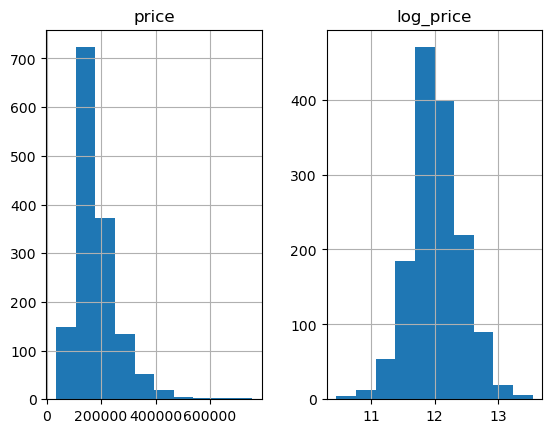

In [47]:
# 查看房价分布，发现不平滑，需要对价格进行对数变换
prices = pd.DataFrame({'price':train_df['SalePrice'], 'log_price':np.log1p(train_df['SalePrice'])})
prices.hist()

In [48]:
y_train = np.log1p(train_df.pop('SalePrice')) # 从数据集中删除SalePrice列，并对SalePrice进行log处理并保存到y_train变量中

In [49]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


#### 拼接训练集和测试集

In [50]:
# 查看数据集形状，为下一步拼接做准备
print('训练集形状：', train_df.shape,'测试集形状：', test_df.shape)

训练集形状： (1460, 79) 测试集形状： (1459, 79)


In [51]:
# 纵向拼接训练集和测试集，为下一步对非数值类型特征进行编码做准备
all_df = pd.concat((train_df,test_df),axis=0)

In [52]:
all_df.shape

(2919, 79)

#### 对变量类型进行转换

In [53]:
# MSSubClass为整数类型，但实际上它是分类变量，需要进行转换
all_df['MSSubClass'].dtypes

dtype('int64')

In [54]:
# 转换数据类型
all_df['MSSubClass'] = all_df['MSSubClass'].astype('str')

In [55]:
all_df['MSSubClass'].dtypes

dtype('O')

In [56]:
all_df['MSSubClass'].value_counts() # 统计各个MSSubClass的数量

MSSubClass
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64

#### 对非数值列进行编码

In [57]:
# one-hot encoding
pd.get_dummies(all_df['MSSubClass'])

,120,150,160,180,190,20,30,40,45,50,60,70,75,80,85,90
Id,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2916,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2917,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [58]:
# 对所有非数值列进行one-hot处理，get_dummies()函数会自动判断哪些列是非数值列，对空值的编码为全部填0，并返回一个新的DataFrame。
all_dummy_df = pd.get_dummies(all_df) 

In [59]:
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,False,False,False,True,False,False,False,False,True,False
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,False,False,False,True,False,False,False,False,True,False
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,False,False,False,True,False,False,False,False,True,False
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,False,False,False,True,True,False,False,False,False,False
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,False,False,False,True,False,False,False,False,True,False


#### 处理缺失值

In [60]:
# 查看缺失值最多的10个特征
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
BsmtUnfSF         1
GarageArea        1
TotalBsmtSF       1
GarageCars        1
BsmtFinSF2        1
dtype: int64

In [61]:
mean_cols = all_dummy_df.mean()
mean_cols

LotFrontage                 69.305795
LotArea                  10168.114080
OverallQual                  6.089072
OverallCond                  5.564577
YearBuilt                 1971.312778
                             ...     
SaleCondition_AdjLand        0.004111
SaleCondition_Alloca         0.008222
SaleCondition_Family         0.015759
SaleCondition_Normal         0.822885
SaleCondition_Partial        0.083933
Length: 302, dtype: float64

In [62]:
all_dummy_df = all_dummy_df.fillna(mean_cols)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,False,False,False,True,False,False,False,False,True,False
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,False,False,False,True,False,False,False,False,True,False
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,False,False,False,True,False,False,False,False,True,False
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,False,False,False,True,True,False,False,False,False,False
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,False,False,False,True,False,False,False,False,True,False


In [63]:
all_dummy_df.isnull().sum().sum()

0

#### 标准化数据

In [64]:
numeric_cols = all_df.columns[all_df.dtypes!= 'object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [65]:
numeric_col_means = all_dummy_df.loc[:, numeric_cols].mean() # 数值列的均值
numeric_col_means

LotFrontage         69.305795
LotArea          10168.114080
OverallQual          6.089072
OverallCond          5.564577
YearBuilt         1971.312778
YearRemodAdd      1984.264474
MasVnrArea         102.201312
BsmtFinSF1         441.423235
BsmtFinSF2          49.582248
BsmtUnfSF          560.772104
TotalBsmtSF       1051.777587
1stFlrSF          1159.581706
2ndFlrSF           336.483727
LowQualFinSF         4.694416
GrLivArea         1500.759849
BsmtFullBath         0.429894
BsmtHalfBath         0.061364
FullBath             1.568003
HalfBath             0.380267
BedroomAbvGr         2.860226
KitchenAbvGr         1.044536
TotRmsAbvGrd         6.451524
Fireplaces           0.597122
GarageYrBlt       1978.113406
GarageCars           1.766621
GarageArea         472.874572
WoodDeckSF          93.709832
OpenPorchSF         47.486811
EnclosedPorch       23.098321
3SsnPorch            2.602261
ScreenPorch         16.062350
PoolArea             2.251799
MiscVal             50.825968
MoSold    

In [66]:
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std() # 计算数值列的标准差
numeric_col_std

LotFrontage        21.312345
LotArea          7886.996359
OverallQual         1.409947
OverallCond         1.113131
YearBuilt          30.291442
YearRemodAdd       20.894344
MasVnrArea        178.626089
BsmtFinSF1        455.532750
BsmtFinSF2        169.176615
BsmtUnfSF         439.468337
TotalBsmtSF       440.690726
1stFlrSF          392.362079
2ndFlrSF          428.701456
LowQualFinSF       46.396825
GrLivArea         506.051045
BsmtFullBath        0.524556
BsmtHalfBath        0.245603
FullBath            0.552969
HalfBath            0.502872
BedroomAbvGr        0.822693
KitchenAbvGr        0.214462
TotRmsAbvGrd        1.569379
Fireplaces          0.646129
GarageYrBlt        24.867762
GarageCars          0.761494
GarageArea        215.357904
WoodDeckSF        126.526589
OpenPorchSF        67.575493
EnclosedPorch      64.244246
3SsnPorch          25.188169
ScreenPorch        56.184365
PoolArea           35.663946
MiscVal           567.402211
MoSold              2.714762
YrSold        

In [67]:
all_dummy_df.loc[:,numeric_cols] = (all_dummy_df.loc[:,numeric_cols] - numeric_col_means)/numeric_col_std

C:\Users\Man\AppData\Local\Temp\ipykernel_23604\512293669.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.21784137 -0.07203174  0.13717338 ...  1.24659445  0.03459947
 -0.06860838]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  all_dummy_df.loc[:,numeric_cols] = (all_dummy_df.loc[:,numeric_cols] - numeric_col_means)/numeric_col_std
C:\Users\Man\AppData\Local\Temp\ipykernel_23604\512293669.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.6460727  -0.06317371  0.6460727  ... -0.77242013 -0.77242013
  0.6460727 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  all_dummy_df.loc[:,numeric_cols] = (all_dummy_df.loc[:,numeric_cols] - numeric_col_means)/numeric_col_std
C:\Users\Man\AppData\Local\Temp\ipykernel_23604\512293669.py:1: FutureWarning: Setting

In [68]:
all_dummy_df.loc[:,numeric_cols]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.202033,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.525112,0.580807,-0.29308,-0.934702,...,0.348840,-0.740634,0.199972,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,0.157619
2,0.501785,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.572152,1.177910,-0.29308,-0.629788,...,-0.059782,1.614603,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.446848,-0.602858
3,-0.061269,0.137173,0.646073,-0.507197,0.980053,0.848819,0.334770,0.097856,-0.29308,-0.288467,...,0.627446,-0.740634,-0.081195,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,1.026577,0.157619
4,-0.436639,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.572152,-0.494856,-0.29308,-0.047266,...,0.785323,-0.740634,-0.184783,3.874303,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,-1.363335
5,0.689469,0.518814,1.355319,-0.507197,0.947040,0.753100,1.387248,0.468851,-0.29308,-0.161040,...,1.686149,0.776834,0.540332,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,2.131647,0.157619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,-2.266564,-1.043758,-1.481667,1.289537,-0.043338,-0.682695,-0.572152,-0.969026,-0.29308,-0.033614,...,-2.195761,-0.740634,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.078492,-1.363335
2916,-2.266564,-1.049083,-1.481667,-0.507197,-0.043338,-0.682695,-0.572152,-0.415828,-0.29308,-0.607034,...,-0.867740,-0.740634,-0.347564,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.815205,-1.363335
2917,4.255477,1.246594,-0.772420,1.289537,-0.373465,0.561660,-0.572152,1.717937,-0.29308,-1.276024,...,0.478856,3.005615,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,1.026577,-1.363335


#### 划分数据集

In [69]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_train_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.202033,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.525112,0.580807,-0.293080,-0.934702,...,False,False,False,True,False,False,False,False,True,False
2,0.501785,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.572152,1.177910,-0.293080,-0.629788,...,False,False,False,True,False,False,False,False,True,False
3,-0.061269,0.137173,0.646073,-0.507197,0.980053,0.848819,0.334770,0.097856,-0.293080,-0.288467,...,False,False,False,True,False,False,False,False,True,False
4,-0.436639,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.572152,-0.494856,-0.293080,-0.047266,...,False,False,False,True,True,False,False,False,False,False
5,0.689469,0.518814,1.355319,-0.507197,0.947040,0.753100,1.387248,0.468851,-0.293080,-0.161040,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,-0.342796,-0.285421,-0.063174,-0.507197,0.914028,0.753100,-0.572152,-0.969026,-0.293080,0.892505,...,False,False,False,True,False,False,False,False,True,False
1457,0.736390,0.381246,-0.063174,0.391170,0.220763,0.178782,0.094044,0.765207,0.670410,0.064232,...,False,False,False,True,False,False,False,False,True,False
1458,-0.155112,-0.142781,0.646073,3.086271,-1.000704,1.040259,-0.572152,-0.365338,-0.293080,0.719569,...,False,False,False,True,False,False,False,False,True,False


In [70]:
dummy_test_df = all_dummy_df.loc[test_df.index]
dummy_test_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.501785,0.184340,-0.772420,0.391170,-0.340452,-1.113434,-0.572152,0.058342,0.558102,-0.661645,...,False,False,False,True,False,False,False,False,True,False
1462,0.548706,0.519702,-0.063174,0.391170,-0.439490,-1.257014,0.032463,1.057173,-0.293080,-0.352180,...,False,False,False,True,False,False,False,False,True,False
1463,0.220258,0.464294,-0.772420,-0.507197,0.848003,0.657380,-0.572152,0.767402,-0.293080,-0.964284,...,False,False,False,True,False,False,False,False,True,False
1464,0.407942,-0.024105,-0.063174,0.391170,0.881015,0.657380,-0.460186,0.352503,-0.293080,-0.538769,...,False,False,False,True,False,False,False,False,True,False
1465,-1.234298,-0.654636,1.355319,-0.507197,0.682939,0.370221,-0.572152,-0.391680,-0.293080,1.038136,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,-2.266564,-1.043758,-1.481667,1.289537,-0.043338,-0.682695,-0.572152,-0.969026,-0.293080,-0.033614,...,False,False,False,True,False,False,False,False,True,False
2916,-2.266564,-1.049083,-1.481667,-0.507197,-0.043338,-0.682695,-0.572152,-0.415828,-0.293080,-0.607034,...,False,False,False,True,True,False,False,False,False,False
2917,4.255477,1.246594,-0.772420,1.289537,-0.373465,0.561660,-0.572152,1.717937,-0.293080,-1.276024,...,False,False,False,True,True,False,False,False,False,False


#### 模型训练

##### 岭回归

In [71]:
# 划分数据集
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
X_train = dummy_train_df.values
X_test = dummy_test_df.values
y_train = y_train.values

In [72]:
# 网格搜索
alphas = np.logspace(-3, 2, 50)

In [73]:
test_scores = []

In [74]:
from sklearn.model_selection import cross_val_score
for alpha in alphas:
    clf = Ridge(alpha=alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(test_score.mean())

In [75]:
test_scores

[0.15327967052111185,
 0.1532503875275893,
 0.15321608905791415,
 0.15317399479115806,
 0.15312138698742994,
 0.15305568124860924,
 0.15297441932771466,
 0.15287519772540273,
 0.15275554655984536,
 0.1526127762404283,
 0.15244381875556354,
 0.15224510249939252,
 0.15201250661022847,
 0.15174143661161152,
 0.1514270476010092,
 0.15106461809601898,
 0.15065004856526665,
 0.1501804214611237,
 0.1496545155206625,
 0.14907313152044205,
 0.14843909076685732,
 0.14775684325977267,
 0.14703177255930905,
 0.1462694560736098,
 0.14547522969289153,
 0.1446543188250729,
 0.14381253146656192,
 0.14295719295909484,
 0.14209783146292945,
 0.14124621717268834,
 0.14041566356616683,
 0.13961982557043767,
 0.13887139349192165,
 0.1381810341855439,
 0.1375567673832684,
 0.13700381662891686,
 0.13652489663320547,
 0.13612085891827294,
 0.13579156614286989,
 0.13553680274949148,
 0.13535700158299316,
 0.13525361328027835,
 0.1352290623427413,
 0.1352863727196391,
 0.1354286472959797,
 0.13565861290095876,


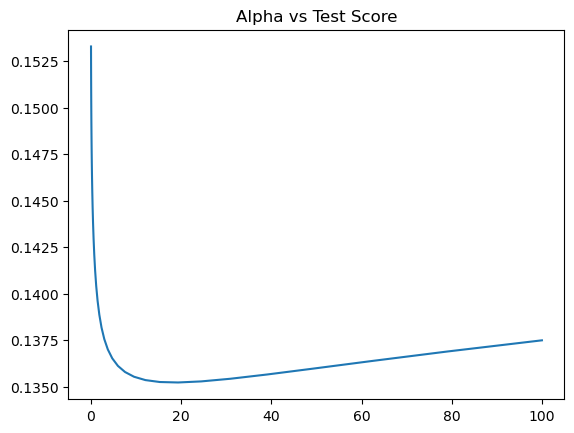

In [76]:
import matplotlib.pyplot as plt
plt.plot(alphas, test_scores)
plt.title("Alpha vs Test Score")
plt.show()

In [77]:
ridge = Ridge(alpha=17)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [78]:
y_pred2 = np.expm1(y_pred)
y_pred2

array([113342.07481779, 148927.20671963, 170306.73023878, ...,
       159271.4209774 , 112520.46302475, 224787.00980434])

##### K-近邻算法

In [79]:
# 划分数据集
from sklearn.neighbors import KNeighborsRegressor  # 改为回归器
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = dummy_train_df.values
y = y_train
X_train, X_test, k_y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 建立模型
X_test1 = dummy_test_df.values
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# 1. 定义模型
knn_reg = KNeighborsRegressor()

# 2. 定义超参数网格
param_grid = {
    'n_neighbors': [3, 5, 7, 9],      # 邻居数量
    'weights': ['uniform', 'distance'],  # 权重计算方式
    'metric': ['euclidean', 'manhattan']  # 距离度量
}

# 3. 自定义评分指标（可选）
scorers = {
    'r2': 'r2',                       # R²分数
    'neg_mse': make_scorer(mean_squared_error, greater_is_better=False)
}

# 4. 初始化网格搜索
grid_search = GridSearchCV(
    estimator=knn_reg,
    param_grid=param_grid,
    scoring=scorers,
    refit='r2',                       # 最终用R²选择最佳模型
    cv=5,                             # 5折交叉验证
    verbose=1                         # 打印进度
)

# 5. 执行搜索
grid_search.fit(X_train, k_y_train)

# 6. 输出最佳参数和得分
print("最佳参数:", grid_search.best_params_)
print("最佳R²分数:", grid_search.best_score_)

# 7. 使用最佳模型预测
best_knn = grid_search.best_estimator_
test_score = best_knn.score(X_test, y_test)
print("测试集R²分数:", test_score)
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, k_y_train)
score = knn_reg.score(X_train, k_y_train)  # 返回R²分数
print("模型得分:", score)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
最佳参数: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
最佳R²分数: 0.8184334445291782
测试集R²分数: 0.82526413692661
模型得分: 0.9035820395102799


In [80]:
knn_reg.fit(X_train, k_y_train)
score = knn_reg.score(X_train, k_y_train)  # 返回R²分数
print("模型得分:", score)

模型得分: 0.9035820395102799


##### 决策树回归

In [81]:
# 划分数据集
from sklearn.tree import DecisionTreeRegressor  # 改为决策树回归器
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# 数据准备（假设已加载）
X = dummy_train_df.values
y = y_train
X_train, X_test, t_y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test1 = dummy_test_df.values

# 1. 定义决策树回归模型
dt_reg = DecisionTreeRegressor(random_state=42)

# 2. 定义超参数网格
param_grid = {
    'max_depth': [3, 5, 7, None],      # 树的最大深度（None表示不限制）
    'min_samples_split': [2, 5, 10],    # 分裂所需最小样本数
    'min_samples_leaf': [1, 2, 4],      # 叶节点最小样本数
    'criterion': ['squared_error', 'friedman_mse']  # 分裂标准
}

# 3. 初始化网格搜索
grid_search = GridSearchCV(
    estimator=dt_reg,
    param_grid=param_grid,
    scoring={'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},
    refit='r2',                       # 用R²选择最佳模型
    cv=5,                             # 5折交叉验证
    verbose=1                         # 打印进度
)

# 4. 执行网格搜索
grid_search.fit(X_train, t_y_train)

# 5. 输出最佳参数和得分
print("最佳参数:", grid_search.best_params_)
print("最佳R²分数:", grid_search.best_score_)

# 6. 使用最佳模型预测
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
print("\n测试集评估:")
print(f"R²分数: {test_r2:.4f}")
print(f"均方误差(MSE): {test_mse:.4f}")

# 7. 训练最终模型（可选）
final_dt = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)
final_dt.fit(X_train, t_y_train)
print("\n最终模型训练集R²:", final_dt.score(X_train, t_y_train))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
最佳参数: {'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
最佳R²分数: 0.7521621225307774

测试集评估:
R²分数: 0.7839
均方误差(MSE): 0.0403

最终模型训练集R²: 0.9523647828989655


##### 支持向量机回归

In [ ]:
# 划分数据集
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# 数据准备（假设已加载）
X = dummy_train_df.values
y = y_train
X_train, X_test, t_y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test1 = dummy_test_df.values

svc = SVR(kernel='linear')
svc.fit(X_train, t_y_train)
y_pred = svc.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2:", r2)

# 网格搜索
param_grid = {
    'C': [0.1, 1, 10, 100], # 常数项系数C
    'epsilon': [0.01, 0.1, 0.5]  # SVR特有的参数
}

grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, t_y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R² score:", grid_search.best_score_)

# 预测和评估
y_pred = grid_search.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred):.4f}")


MSE: 0.01844809816378481
R2: 0.9011414156086349
